<a href="https://colab.research.google.com/github/DimaFrank/Mathematical_Programming/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize
import sympy as smp
from scipy.integrate import quad 
from scipy.integrate import cumulative_trapezoid
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from sklearn.linear_model import LinearRegression

**Student Name**: Dima Frank


**id**: 32731438

#Assignment 1



# **שאלה** **1**
מצאו פתרון נומרי לחישובים הבאים בעזרת פונקציות של פייתון 


***א)***

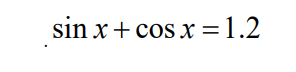

תחילה נעביר אגפים ונגדיר את הפונקצייה שלנו

ובעזרת פונקצייה של פייתון נמצא את הפתרון של המשוואה

In [ ]:
def f(x):
  return np.sin(x) + np.cos(x) - 1.2

y = scipy.optimize.fsolve(f,0)
y

array([0.22779934])

***ב)***

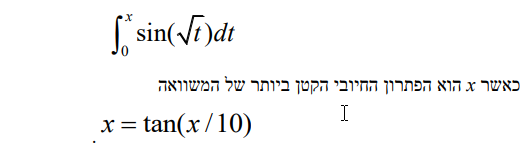

.קודם כל בעזרת הלולאה אני מוצאה פתרון החיובי הקטן ביותר של המשוואה

האיקס הקטן ביותר שפותר את המשוואה שווה בערך ל-15.0442


In [ ]:
from sympy.printing import precedence
precision=0.00001

x=0.1
end=20

while x-np.tan(x/10) > precision and x < end:
    x+=precision

print(x)

15.044239999599634


נחשב למה שווה האינטגרל מסויים

In [ ]:
t = smp.symbols('t', real=True)
f = smp.sin(smp.sqrt(t))
f

sin(sqrt(t))

In [ ]:
smp.integrate(f)

-2*sqrt(t)*cos(sqrt(t)) + 2*sin(sqrt(t))

נציב את הגבול התחתון (0) ואת הגבול העליון שקיבלנו (15.0442) לתוך הפונקציה שמחשבת את האינטגרל

In [ ]:
def integral_calc(low, high):
  l = -2*np.sqrt(low)*np.cos(np.sqrt(low)) + 2*np.sin(np.sqrt(low))
  h = -2*np.sqrt(high)*np.cos(np.sqrt(high)) + 2*np.sin(np.sqrt(high))
  return h-l

integral_calc(0,x)

4.399454284529552

**תשובה:** 4.39945

***ג)***

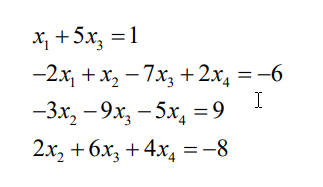

In [ ]:
A= np.array([[1,0,5,0],
             [-2,1,-7,2],
             [0,-3,-9,-5],
             [0,2,6,4]])

B = np.array([1,-6,9,-8])

In [ ]:
np.linalg.det(A)

0.0

מכיוון שמטריצת המקדמים היא סינגולרית 
(דטרמיננטה שווה ל-0)
לא ניתן להשתמש בשיטה הרגילה של פייתון

פייתון מקפיץ שגיעה של הסינגולריות

In [ ]:
from scipy.sparse.linalg.eigen.lobpcg.lobpcg import LinAlgError
try:
  x = np.linalg.solve(A,B)
  x
except(LinAlgError):
  print('Singular matrix error!')

Singular matrix error!


למרות הסינגולריות של המטריצה אפשר להפוך את הביטוי באזרת נוסחה הבאה ואז לפתור אותו רגיל

Screenshot - 25_11.png

In [ ]:
A_T = np.transpose(A)

In [ ]:
new_A = np.dot(A_T, A)
new_B = np.dot(A_T, B)

In [ ]:
#תשובה
x = np.linalg.solve(new_A,new_B)
x

array([-4., -1.,  1., -3.])

In [ ]:
# בדיקה
res= np.dot(A,x)
res

array([ 1., -6.,  9., -8.])

***ד)***

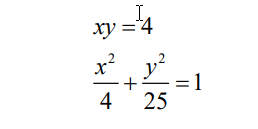

נגדיר מערכת המשוואות בעזרת פונקצייה של פייתון

ואת הניחוש הראשוני נאחלס ב [1,1]

In [ ]:
def func(z):
  x=z[0]
  y=z[1]
  F=np.empty(2)
  F[0] = x*y-4
  F[1] = (x**2)/4 + (y**2)/25 -1
  return F

zGuess=np.array([1,1])
z = scipy.optimize.fsolve(func, zGuess)
z

array([1.78885438, 2.23606798])

# **שאלה** **2**

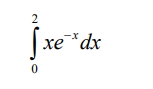

***:הפתרון האנליטי***

In [ ]:
# נגדיר את הפונקציה
x = smp.symbols('x', real=True)
f = x * smp.exp(-x)
f

x*exp(-x)

In [ ]:
# אינטגרציה
smp.integrate(f)

(-x - 1)*exp(-x)

In [ ]:
# חישוב האינטגרל
def f(x):
  return (-x-1)*np.exp(-x)

def calc(low, high, f):
   return f(high)-f(low)  

In [ ]:
# תוצאה סופית של חישוב האינטגרל מ-0 עד-2
calculated_integral = calc(0,2,f)
calculated_integral

0.5939941502901619

***:הפתרון הנומרי***


In [ ]:
integrand = lambda x : x * np.exp(-x)
a = 0
b = 2

result, error = quad(integrand, a, b)
print('Result is ', result, 'with error ', error)

Result is  0.593994150290162 with error  6.594659821447934e-15


***:הפתרן הנומרי עם פרמטרים המבטיחים שגיאה קטנה יותר***

בעזרת פרמטרים 

epsabs, limit

אפשר להגדיר לאלגוריתם את רמת האדישות לשגיאה ולכמה מרווחים לחלק את השטח מתחת לפונקציה(ברירת מחדל היא 50)

על-ידי הוספת פרמטרים האלה ניתן לשפר את הדיוק של האלגוריתם

In [ ]:
result, error = quad(integrand, a, b,  epsabs = 1e-4, limit=100)
print('Result is ', result, 'with error ', error)

Result is  0.593994150290162 with error  6.594659821447934e-15


***:כלל הטרפז***

בניסוי מטה ניתן לראות שעל מנת להגיעה לדיוק של 0.01 בתוצאת האינטגרל בשיטת הטרפז
צריך לפרוס את השטח של האינטגרל לפחות ל-24 טרפזים.
ככל שנרצה דיוק יותר גבוהה ,נצתרך להגדיל כמות הטרפזים 

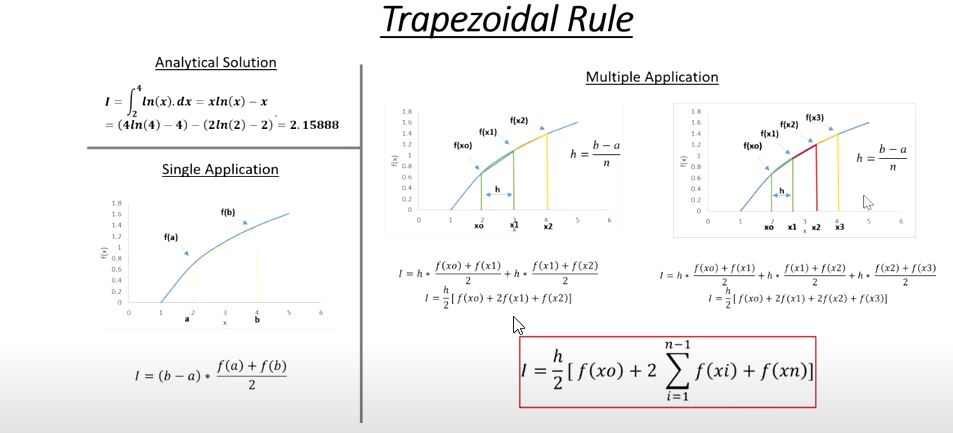

In [ ]:
# Function
f = lambda x: x*np.exp(-x)

# Integration limits
a = 0
b = 2

# Initial number of Trapezoids
n = 1

approx_error = 100; old=100


print('n  \t\t approx_error     true_error   \t integral')
while approx_error > 0.01:
  
  # Calculate number of segments
  h = (b-a) / n

  # Calculate sumation term
  Sum = 0
  for i in range(1,n):
    Sum += 2 * f(a+i*h)


  # Calculate Integral estimate
  integral = (h/2)*(f(a)+Sum+f(b))

  # Calculate aproximate & true error
  approx_error = abs((integral-old)/integral)*100
  true_error = abs((calculated_integral-integral)/calculated_integral)*100

  print('%f  \t  %f  \t  %f  \t  %f'% (n, approx_error, true_error, integral))

  # Store current estimete for next iteration
  old = integral

  # Increase number of trapezoids by one
  n += 1

n  		 approx_error     true_error   	 integral
1.000000  	  36845.280495  	  54.432116  	  0.270671
2.000000  	  46.211716  	  15.282882  	  0.503215
3.000000  	  8.956249  	  6.949004  	  0.552717
4.000000  	  3.131889  	  3.940528  	  0.570588
5.000000  	  1.445691  	  2.531434  	  0.578958
6.000000  	  0.783698  	  1.761541  	  0.583531
7.000000  	  0.471862  	  1.295794  	  0.586297
8.000000  	  0.305943  	  0.992889  	  0.588096
9.000000  	  0.209597  	  0.784937  	  0.589332
10.000000  	  0.149840  	  0.636049  	  0.590216
11.000000  	  0.110818  	  0.525814  	  0.590871
12.000000  	  0.084258  	  0.441928  	  0.591369
13.000000  	  0.065556  	  0.376619  	  0.591757
14.000000  	  0.052006  	  0.324782  	  0.592065
15.000000  	  0.041948  	  0.282953  	  0.592313
16.000000  	  0.034327  	  0.248711  	  0.592517
17.000000  	  0.028446  	  0.220328  	  0.592685
18.000000  	  0.023835  	  0.196540  	  0.592827
19.000000  	  0.020170  	  0.176405  	  0.592946
20.000000  	  0.017220  

**נבדוק מה קורה כאשר** 

 1000, 500, 200, 100, 50, 20, 10 =n

In [ ]:
n_list = [10,20,50,100,200,500,1000]
print(n_list)
print(calculated_integral)

[10, 20, 50, 100, 200, 500, 1000]
0.5939941502901619


In [ ]:
myFunction = lambda x: x*np.exp(-x)
a = 0
b = 2
errors= []

def trapez_integration(func, low_limit, high_limit, n):
  start = 1
  approx_error = 100; old=100
  while start <= n:
    h = (high_limit-low_limit) / start
    Sum = 0
    for i in range(1,start):
      Sum += 2 * func(low_limit+i*h)

    integral = (h/2)*(func(low_limit)+Sum+func(high_limit))
    approx_error = abs((integral-old)/integral)*100
    #true_error = abs((calculated_integral-integral)/calculated_integral)*100
    true_error=calculated_integral-integral
    errors.append(true_error)
    start += 1
    
  return integral

In [ ]:
print('Original Integral: ', calculated_integral)
print()
for i in range(len(n_list)):
  print('n={}  Integral={}'.format(n_list[i],trapez_integration(myFunction,a,b,n_list[i])))

Original Integral:  0.5939941502901619

n=10  Integral=0.5902160555582594
n=20  Integral=0.5930484352723654
n=50  Integral=0.5938427824372495
n=100  Integral=0.5939563064173033
n=200  Integral=0.5939846892025888
n=500  Integral=0.5939926365108025
n=1000  Integral=0.593993771845131


ניתן לראות שעל-ידי פריסה של שטח האינטגרל ל-1000 טרפזים, הדיוק של האינטגרל מתקרב לספרה שישית אחרי הנקודה

In [ ]:
errors = []
trapez_integration(myFunction,a,b,10)
errors = np.array(errors)
log_errors=np.log(abs(errors))

In [ ]:
errors

array([0.32332358, 0.09077943, 0.04127667, 0.0234065 , 0.01503657,
       0.01046345, 0.00769694, 0.0058977 , 0.00466248, 0.00377809])

In [ ]:
log_errors

array([-1.12910165, -2.39932261, -3.18745772, -3.75474139, -4.19727019,
       -4.5598669 , -4.86693268, -5.13319287, -5.36820837, -5.57853544])

נמצא את השיפוע של לוג של השגיאה בעזרת רגרסיה לינארית

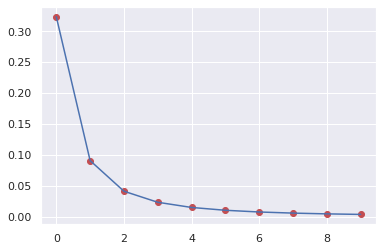

In [ ]:
plt.plot(np.arange(0,10),errors, 'ro')
plt.plot(np.arange(0,10),errors)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
x=np.arange(0,10).reshape(-1,1)
y=np.array(log_errors).reshape(-1,1)
regressor.fit(x,y)
regressor.coef_

array([[-0.45003]])

In [ ]:
regressor.score(x,y)

0.9143613649719208

**שיטת סימפסון**


In [ ]:
# Define function to integrate
def f(x):
    return x*np.exp(-x)

# Implementing Simpson's method
def simpson13(x0,xn,n):
    # calculating step size
    h = (xn - x0) / n
    
    # Finding sum 
    integration = f(x0) + f(xn)
    
    for i in range(1,n):
        k = x0 + i*h
        
        if i%2 == 0:
            integration = integration + 2 * f(k)
        else:
            integration = integration + 4 * f(k)
    
    # Finding final integration value
    integration = integration * h/3
    
    return integration
    
# Input section
lower_limit = float(input("Enter lower limit of integration: "))
upper_limit = float(input("Enter upper limit of integration: "))
sub_interval = int(input("Enter number of sub intervals: "))

# Call trapezoidal() method and get result
result = simpson13(lower_limit, upper_limit, sub_interval)
print("Integration result by Simpson's method is: %0.6f" % (result) )

Enter lower limit of integration: 0
Enter upper limit of integration: 2
Enter number of sub intervals: 100
Integration result by Simpson's method is: 0.593994


In [ ]:
n_list = [10,20,50,100,200,500,1000]

def sympson_integral_calc(func, N, low_limit, high_limit):
    h = (high_limit - low_limit) / N
    integration = f(low_limit) + f(high_limit) 
    for i in range(1,N):
        k = low_limit + i*h        
        if i%2 == 0:
            integration = integration + 2 * f(k)
        else:
            integration = integration + 4 * f(k)
  
    integration = integration * h/3
    return integration


for i in range(len(n_list)):
  print('Sympson Integral with N={} is: {}'.format(n_list[i],sympson_integral_calc(lambda x: x*np.exp(-x), n_list[i], 0, 2)))

Sympson Integral with N=10 is: 0.5939688799402475
Sympson Integral with N=20 is: 0.5939925618437342
Sympson Integral with N=50 is: 0.5939941095607061
Sympson Integral with N=100 is: 0.5939941477439881
Sympson Integral with N=200 is: 0.5939941501310172
Sympson Integral with N=500 is: 0.5939941502860872
Sympson Integral with N=1000 is: 0.5939941502899071


**ניתן לראות ששיטת הסימפסון מתכנסת הרבה יותר מהר,כבר אחרי 50 איטרציות התוצאה זהה לערך האינטגרל שחישבנו בהתחלה**

דרך נוספת לחשב את האינטגרל לפי שיטת סימפסון היא להשתמש בפונקציה מובנת בחבילה של 


scipy 


In [ ]:
from scipy.integrate import simps, romb
a=0
b=2
N=1000
h=(b-a)/N
x=np.linspace(a,b,N)
y=x*np.exp(-x)
simp=simps(y,x)
print(simp)

0.5939941496221938


# **שאלה** **3**


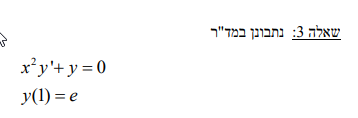

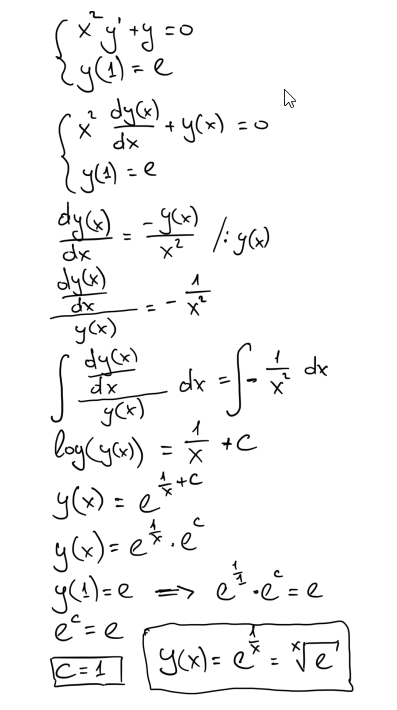

ניצור פונקציה שמחזירה את הנגזרת שלנו 

**dydt**

נעביר את הנגזרת יחד עם התנאי ההתחלה כפרמטרים לתוך הפונקציה 

odeint

ואז נחשב את ההפרש בערך מוחלט בין פונקציה אמיתית שקיבלנו למעלה לבין הקירוב שעשינו
בעזרת פונקציה של פייתון

את השגיעה נשים על הגרף


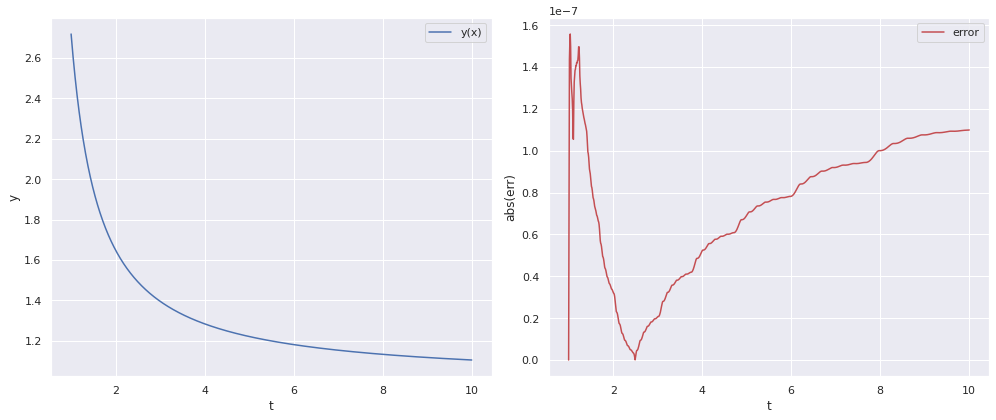

In [ ]:
def model(y, t):
    dydt = -y/t**2
    return dydt

t = np.linspace(1, 10, 1001)
y0 = np.exp(1)
sol = odeint(model, y0, t)

def func(x):
  return np.exp(1/x)

err=abs(func(t).reshape(-1,1)-sol)

# plot initial function
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(t,sol,label="y(x)")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()


plt.subplot(122)
plt.plot(t,err,'r-',label='error')
plt.xlabel('t')
plt.ylabel('abs(err)')
plt.legend()

plt.tight_layout()
plt.show()

***:מקסימום שגיאה בערך מוחלט בין פתרון הנומרי לבין פתרון האנליטי היא***





In [ ]:
max(err)

array([1.55740239e-07])

על ידי הוספת פרמרטר 

rtol

לפונקציה

odeint 

ניתן להגדיר את השגיעה המקסימלית
וכך לפשר את הדיוק של האלגוריתם


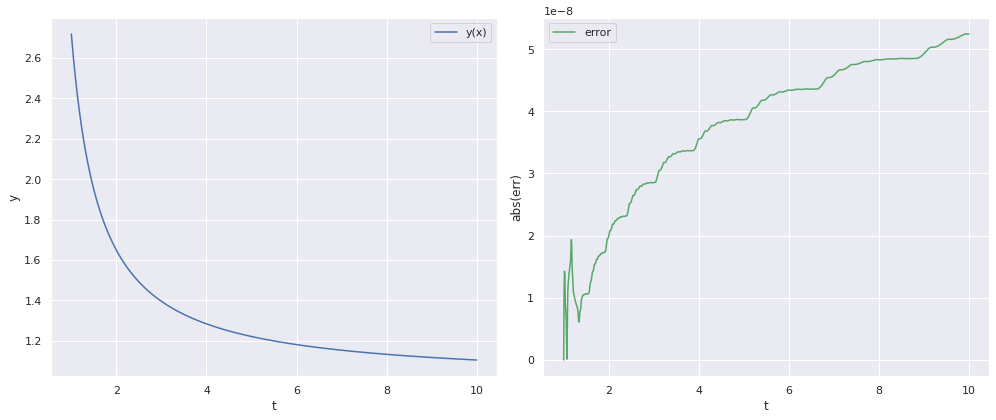

In [ ]:
t = np.linspace(1, 10, 1001)
y0 = np.exp(1)
sol2 = odeint(model, y0, t, rtol=1e-20)
err=abs(func(t).reshape(-1,1)-sol2)

# plot initial function
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(t,sol2,label="y(x)")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()


plt.subplot(122)
plt.plot(t,err,'g-',label='error')
plt.xlabel('t')
plt.ylabel('abs(err)')
plt.legend()

plt.tight_layout()
plt.show()

נשים שלושת הפתרונות יחד על הגרף

ניתן לראות שכמעט לאורך כל t

הפונקציות מתלכדות

חוץ מקטע t<2

איפה שניתן לראות פערים בין הפונקציות בגלל השגיעה שהיא יחסית גבוהה שם

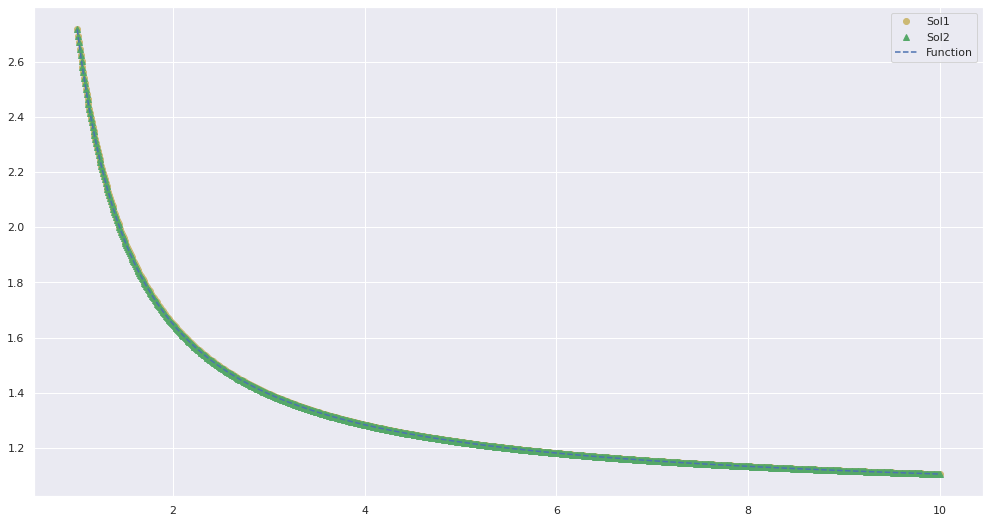

In [ ]:
def analytical_sol(x):
  return np.exp(1/x)

plt.figure(figsize=(17,9))
plt.plot(t, sol,'yo', label='Sol1')
plt.plot(t, sol2,'g^', label='Sol2')
plt.plot(t, analytical_sol(t),'b--', label='Function')
plt.legend()
plt.show()

# **שאלה** **4**

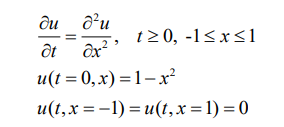

נגדיר את הוקטורים 

x, t

ואת הגודל של הצעדים

נגדיר את התנאי ההתחלה

נמצא את הפתרון איטרתיבית העזרת לולאה 

In [ ]:
h = 0.25
k = 0.25
x = np.arange(0, 1+h, h)
t = np.array([0,1,2,10])
boundaryConditions = [0,0]
initialConditions = 1-x**2

n = len(x)
m = len(t)
T = np.zeros((n,m))
T[0,:] = boundaryConditions[0]
T[-1,:] = boundaryConditions[1]
T[:,0] = initialConditions
factor = k/h**2

A = np.diag([1+2*factor]*3) + np.diag([-factor]*2,-1) + np.diag([-factor]*2, 1)

for j in range(1,m):
  b = T[1:-1,j-1].copy()
  b[0] = b[0] + factor*T[0,j]
  b[-1] = b[-1] + factor*T[-1,j]
  solution = np.linalg.solve(A,b)
  T[1:-1,j] = solution
  print(solution)

print()  
T.round(3)

[0.21527778 0.25       0.15972222]
[0.05793336 0.07653061 0.05176052]
[0.01666426 0.02301125 0.01597839]



array([[1.   , 0.   , 0.   , 0.   ],
       [0.938, 0.215, 0.058, 0.017],
       [0.75 , 0.25 , 0.077, 0.023],
       [0.438, 0.16 , 0.052, 0.016],
       [0.   , 0.   , 0.   , 0.   ]])

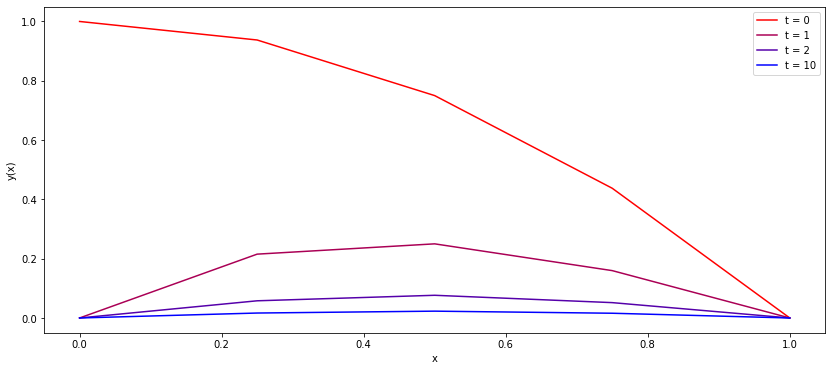

In [ ]:
R = np.linspace(1,0,m)
B = np.linspace(0,1,m)
G = 0

plt.figure(figsize=(14,6))
for j in range(m):
  plt.plot(x, T[:,j], color=[R[j],G,B[j]])


plt.xlabel('x')
plt.ylabel('y(x)') 
plt.legend([f't = {value}' for value in t])
